In [90]:
#Prepare a prediction model for predicting Price.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

In [92]:
# Importing data
df = pd.read_csv("ToyotaCorolla.csv", encoding='latin-1')

In [93]:
df.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [96]:
# Selecting only required columns
# Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

required_columns = ["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight","Price"] 
new_df_final = df[required_columns]
new_df_final

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [97]:
new_df_final.shape

(1436, 9)

In [98]:
# Checking datatypes
new_df_final.dtypes

Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
Price            int64
dtype: object

In [99]:
# Checking dupliacte values
new_df_final[new_df_final.duplicated()]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
113,8,13253,116,2000,5,5,234,1320,24950


In [100]:
# Drop duplicates
new_df_final = new_df_final.drop_duplicates()

# Checking dupliacte values
new_df_final[new_df_final.duplicated()]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price


In [101]:
# Finding Missing Values
new_df_final[new_df_final.isnull().any(axis=1)]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price


## Using Box Plot to detect the outliers

Indices of outliers from the box plots:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 26, 29, 30, 43, 44, 45, 46, 48, 49, 50, 52, 53, 54, 58, 62, 63, 64, 65, 66, 68, 72, 74, 76, 77, 80, 81, 83, 85, 87, 89, 91, 92, 94, 95, 98, 99, 100, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 125, 126, 128, 129, 133, 136, 137, 138, 139, 141, 142, 143, 144, 146, 147, 148, 149, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 196, 197, 199, 203, 204, 209, 210, 211, 214, 216, 221, 223, 231, 243, 254, 268, 270, 272, 282, 296, 319, 322, 330, 336, 373, 378, 379, 380, 381, 382, 384, 386, 387, 389, 390, 391, 397, 401, 402, 406, 412, 416, 418, 422, 427, 432, 436, 444, 447, 458, 461, 463, 465, 473, 480, 487, 489, 501, 515, 523, 552, 586, 588, 601, 603, 604, 605, 606, 607, 608, 

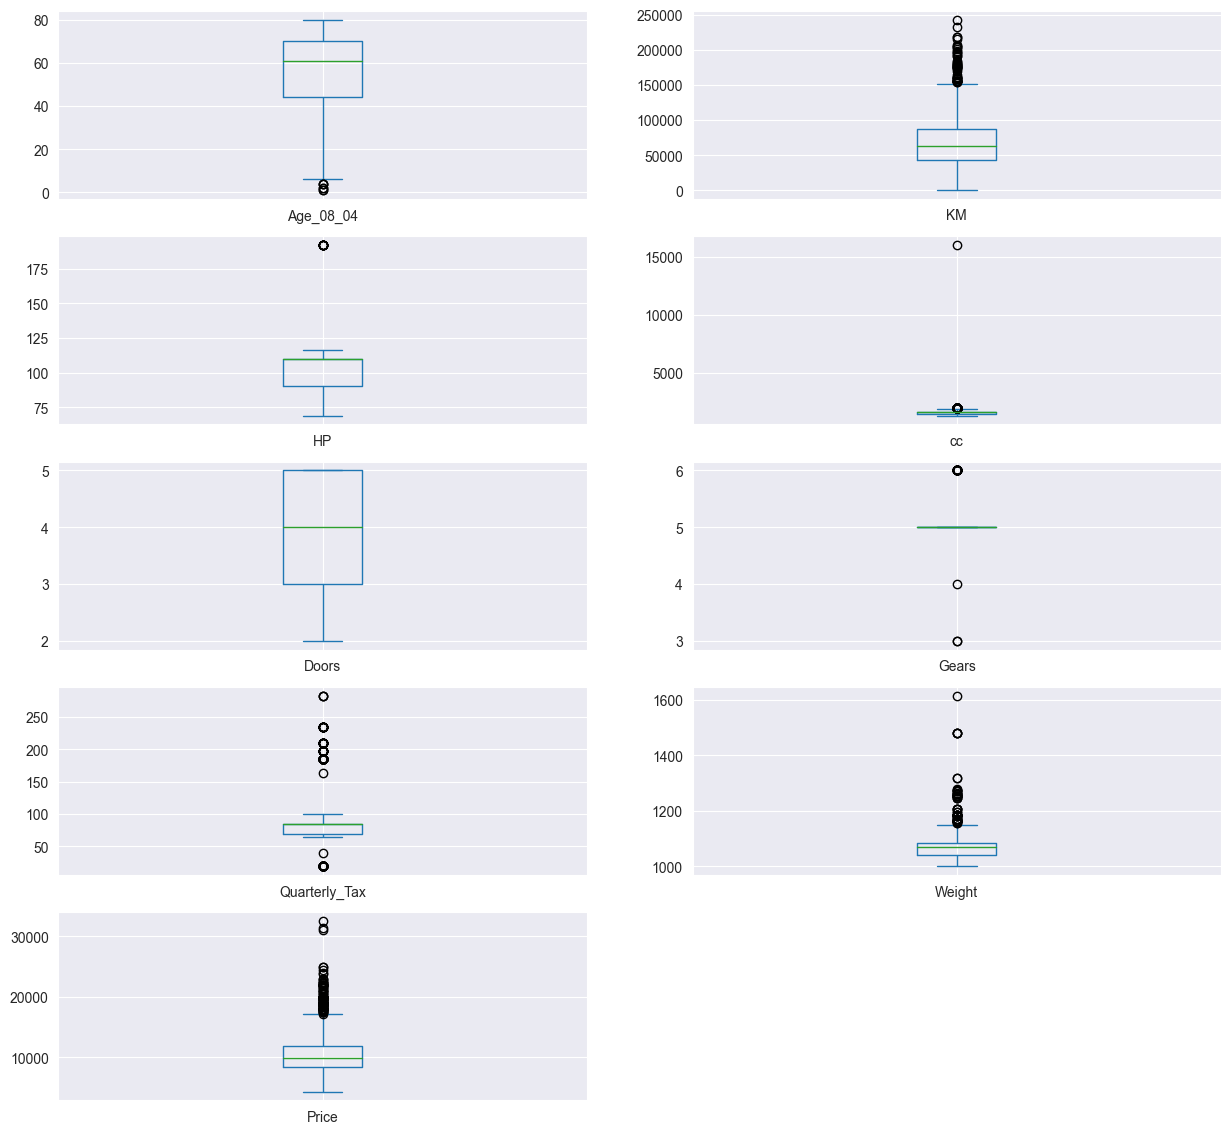

In [102]:
# Box plot find the outliers 

box_plot = new_df_final.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = new_df_final.quantile(0.25)
Q3 = new_df_final.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(new_df_final.columns, box_plot):
    outliers = ((new_df_final[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (new_df_final[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = new_df_final.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

## Using IQR to detect the outliers 

In [103]:
# Calculate quartiles and IQR for each column
Q1 = new_df_final.quantile(0.25)
Q3 = new_df_final.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outlier indices for each column
outlier_indices = []
for column in new_df_final.columns:
    column_outliers = new_df_final[(new_df_final[column] < Q1[column] - outlier_threshold[column]) | 
                         (new_df_final[column] > Q3[column] + outlier_threshold[column])].index
    outlier_indices.extend(column_outliers)

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

print("Outlier Indices:", outlier_indices)
print(len(outlier_indices))


Outlier Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 26, 29, 30, 43, 44, 45, 46, 48, 49, 50, 52, 53, 54, 58, 62, 63, 64, 65, 66, 68, 72, 74, 76, 77, 80, 81, 83, 85, 87, 89, 91, 92, 94, 95, 98, 99, 100, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 125, 126, 128, 129, 133, 136, 137, 138, 139, 141, 142, 143, 144, 146, 147, 148, 149, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 196, 197, 199, 203, 204, 209, 210, 211, 214, 216, 221, 223, 231, 243, 254, 268, 270, 272, 282, 296, 319, 322, 330, 336, 373, 378, 379, 380, 381, 382, 384, 386, 387, 389, 390, 391, 397, 401, 402, 406, 412, 416, 418, 422, 427, 432, 436, 444, 447, 458, 461, 463, 465, 473, 480, 487, 489, 501, 515, 523, 552, 586, 588, 601, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613

## Using Z-Scores to detect the outliers 

In [104]:
# Calculate mean and standard deviation for each column
means = new_df_final.mean()
stds = new_df_final.std()

# Define Z-score threshold (e.g., ±2 or ±3)
z_score_threshold = 3

# Identify outlier indices for each column
outlier_indices = []
for column in new_df_final.columns:
    z_scores = np.abs((new_df_final[column] - means[column]) / stds[column])
    column_outliers = z_scores[z_scores > z_score_threshold].index
    outlier_indices.extend(column_outliers)

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

print("Outlier Indices:", outlier_indices)
print(len(outlier_indices))

Outlier Indices: [0, 1, 1026, 2, 3, 4, 5, 6, 8, 7, 10, 11, 12, 13, 14, 15, 16, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 43, 44, 45, 46, 48, 49, 50, 53, 68, 586, 80, 87, 89, 601, 603, 604, 605, 606, 607, 91, 92, 95, 614, 618, 109, 110, 623, 111, 112, 114, 115, 116, 118, 119, 121, 125, 643, 138, 141, 654, 659, 147, 661, 154, 683, 171, 174, 178, 691, 179, 186, 187, 188, 709, 197, 211, 214, 730, 221, 741, 747, 753, 243, 768, 268, 786, 801, 811, 827, 828, 835, 838, 330, 842, 846, 873, 378, 379, 397, 913, 1426, 915, 920, 921, 939, 444, 956, 960, 964, 461, 991, 1014, 1015]
120


## Even though the outlier methods shows around 120 of the records as outliers, it is important to consider the domain knowleage to treat or change any records in the dataset.

## We need to carefully consider each feature and we need to treat the outliers accordling.

## 1. Feature Age_08_04 has outliers but none of the value is negative. The values range from          0 to 80 which is a reasonable range for the dataset. Hence no outlier treat is required.

## 2. Feature KM has outliers but none of the value is negative. The values range from 0 to                250000 which is a reasonable range for the dataset. Hence no outlier treat is required.

## 3. Feature HP has some outliers which is not in the value range from 0 to 120 which is a                reasonable range for the dataset. Hence we need to treat this outlier. But none of the                record is negative. Hence each record is valueable records.

## 4. Feature cc has some outliers which is not in the value range below 5000 which is a                    reasonable range for the dataset. Hence we need to treat this outlier. But none of the                record is negative. Hence each record is valueable records.

## 5. Feature Doors has no outliers and none of the value is negative. The values range from            2 to 5 which is a reasonable range for the dataset. Hence no outlier treat is required.

## 6. Feature Gears has outliers but none of the value is negative. The values range from                  3 to 6 which is a reasonable range for the dataset. Hence no outlier treat is required.

## 7. Feature Quarterly_Tax has outliers but none of the value is negative. The values                        range from 0 to 300 which is a reasonable range for the dataset. Hence no outlier                      treat is required.

## 8. Feature Weight has outliers but none of the value is negative. The values range from                1000 to 1600 which is a reasonable range for the dataset. Hence no outlier                                   treat is required.

## 9. Feature Price has outliers but none of the value is negative. The values range from                    2000 to 32000 which is a reasonable range for the dataset. Hence no outlier                                   treat is required.

In [106]:
# Create a copy of the DataFrame
new_df_final1 = new_df_final.copy()

## Outlier treatment for HP feature 

In [108]:
# Select a specific feature (column)
selected_feature = 'HP'
feature_values = new_df_final[selected_feature]

# Calculate the median of the selected feature
median_value = feature_values.median()

# Calculate quartiles and IQR for the selected feature
Q1 = feature_values.quantile(0.25)
Q3 = feature_values.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outlier indices within the selected feature
outlier_indices = feature_values[(feature_values < Q1 - outlier_threshold) | 
                                 (feature_values > Q3 + outlier_threshold)].index

# Replace outliers with the median
new_df_final.loc[outlier_indices, selected_feature] = median_value

print(new_df_final)

      Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  Price
0            23  46986   90  2000      3      5            210    1165  13500
1            23  72937   90  2000      3      5            210    1165  13750
2            24  41711   90  2000      3      5            210    1165  13950
3            26  48000   90  2000      3      5            210    1165  14950
4            30  38500   90  2000      3      5            210    1170  13750
...         ...    ...  ...   ...    ...    ...            ...     ...    ...
1431         69  20544   86  1300      3      5             69    1025   7500
1432         72  19000   86  1300      3      5             69    1015  10845
1433         71  17016   86  1300      3      5             69    1015   8500
1434         70  16916   86  1300      3      5             69    1015   7250
1435         76      1  110  1600      5      5             19    1114   6950

[1435 rows x 9 columns]


C:\Users\Vinith MH\AppData\Local\Temp\ipykernel_6248\1938024829.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_final.loc[outlier_indices, selected_feature] = median_value


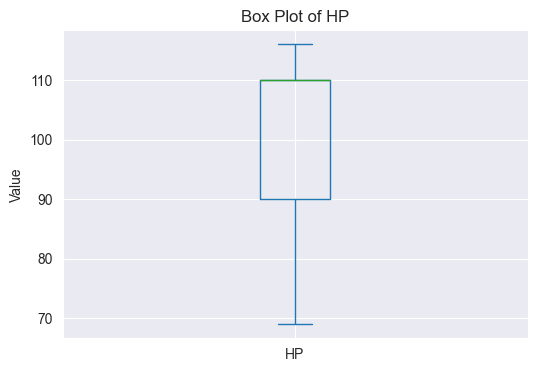

In [109]:
# Select a specific feature (column)
selected_feature = 'HP'

# Draw a box plot for the selected column
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
new_df_final[selected_feature].plot(kind='box')
plt.title(f'Box Plot of {selected_feature}')
plt.ylabel('Value')
plt.show()

In [110]:
# Select a specific feature (column)
selected_feature = 'HP'
feature_values = new_df_final[selected_feature]

# Calculate quartiles and IQR for the selected feature
Q1 = feature_values.quantile(0.25)
Q3 = feature_values.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outlier indices within the selected feature
outlier_indices = feature_values[(feature_values < Q1 - outlier_threshold) | 
                                 (feature_values > Q3 + outlier_threshold)].index

print("Outlier Indices:", outlier_indices)

Outlier Indices: Int64Index([], dtype='int64')


## Outlier treatment for cc feature 

In [111]:
# Select a specific feature (column)
selected_feature = 'cc'
feature_values = new_df_final[selected_feature]

# Calculate the median of the selected feature
median_value = feature_values.median()

# Calculate quartiles and IQR for the selected feature
Q1 = feature_values.quantile(0.25)
Q3 = feature_values.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outlier indices within the selected feature
outlier_indices = feature_values[(feature_values < Q1 - outlier_threshold) | 
                                 (feature_values > Q3 + outlier_threshold)].index

# Replace outliers with the median
new_df_final.loc[outlier_indices, selected_feature] = median_value

print(new_df_final)

      Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  Price
0            23  46986   90  1600      3      5            210    1165  13500
1            23  72937   90  1600      3      5            210    1165  13750
2            24  41711   90  1600      3      5            210    1165  13950
3            26  48000   90  1600      3      5            210    1165  14950
4            30  38500   90  1600      3      5            210    1170  13750
...         ...    ...  ...   ...    ...    ...            ...     ...    ...
1431         69  20544   86  1300      3      5             69    1025   7500
1432         72  19000   86  1300      3      5             69    1015  10845
1433         71  17016   86  1300      3      5             69    1015   8500
1434         70  16916   86  1300      3      5             69    1015   7250
1435         76      1  110  1600      5      5             19    1114   6950

[1435 rows x 9 columns]


C:\Users\Vinith MH\AppData\Local\Temp\ipykernel_6248\2720412400.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_final.loc[outlier_indices, selected_feature] = median_value


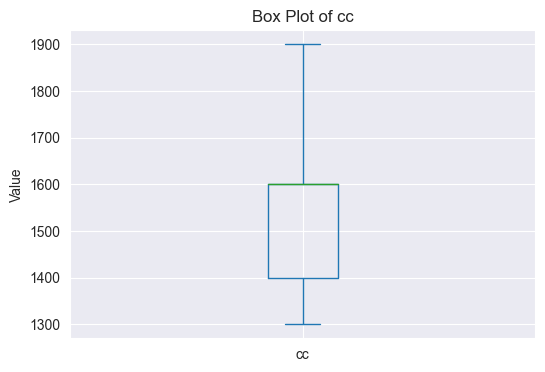

In [112]:
# Select a specific feature (column)
selected_feature = 'cc'

# Draw a box plot for the selected column
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
new_df_final[selected_feature].plot(kind='box')
plt.title(f'Box Plot of {selected_feature}')
plt.ylabel('Value')
plt.show()

In [113]:
# Select a specific feature (column)
selected_feature = 'cc'
feature_values = new_df_final[selected_feature]

# Calculate quartiles and IQR for the selected feature
Q1 = feature_values.quantile(0.25)
Q3 = feature_values.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outlier indices within the selected feature
outlier_indices = feature_values[(feature_values < Q1 - outlier_threshold) | 
                                 (feature_values > Q3 + outlier_threshold)].index

print("Outlier Indices:", outlier_indices)

Outlier Indices: Int64Index([], dtype='int64')


## Boxplot after treating outliers in HP and cc.

Indices of outliers from the box plots:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 26, 29, 30, 43, 44, 45, 46, 48, 49, 50, 52, 53, 54, 58, 62, 63, 64, 65, 66, 68, 72, 74, 76, 77, 80, 81, 83, 85, 87, 89, 91, 92, 94, 95, 98, 99, 100, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 125, 126, 128, 129, 133, 136, 137, 138, 139, 141, 142, 143, 144, 146, 147, 148, 149, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 196, 197, 199, 203, 204, 209, 210, 211, 214, 216, 221, 223, 231, 243, 254, 268, 270, 272, 282, 296, 319, 322, 330, 336, 373, 378, 379, 380, 381, 382, 384, 386, 387, 389, 390, 391, 397, 401, 406, 412, 416, 418, 422, 427, 432, 436, 444, 447, 458, 461, 463, 465, 473, 480, 487, 489, 501, 515, 523, 552, 586, 588, 601, 603, 604, 605, 606, 607, 608, 609, 

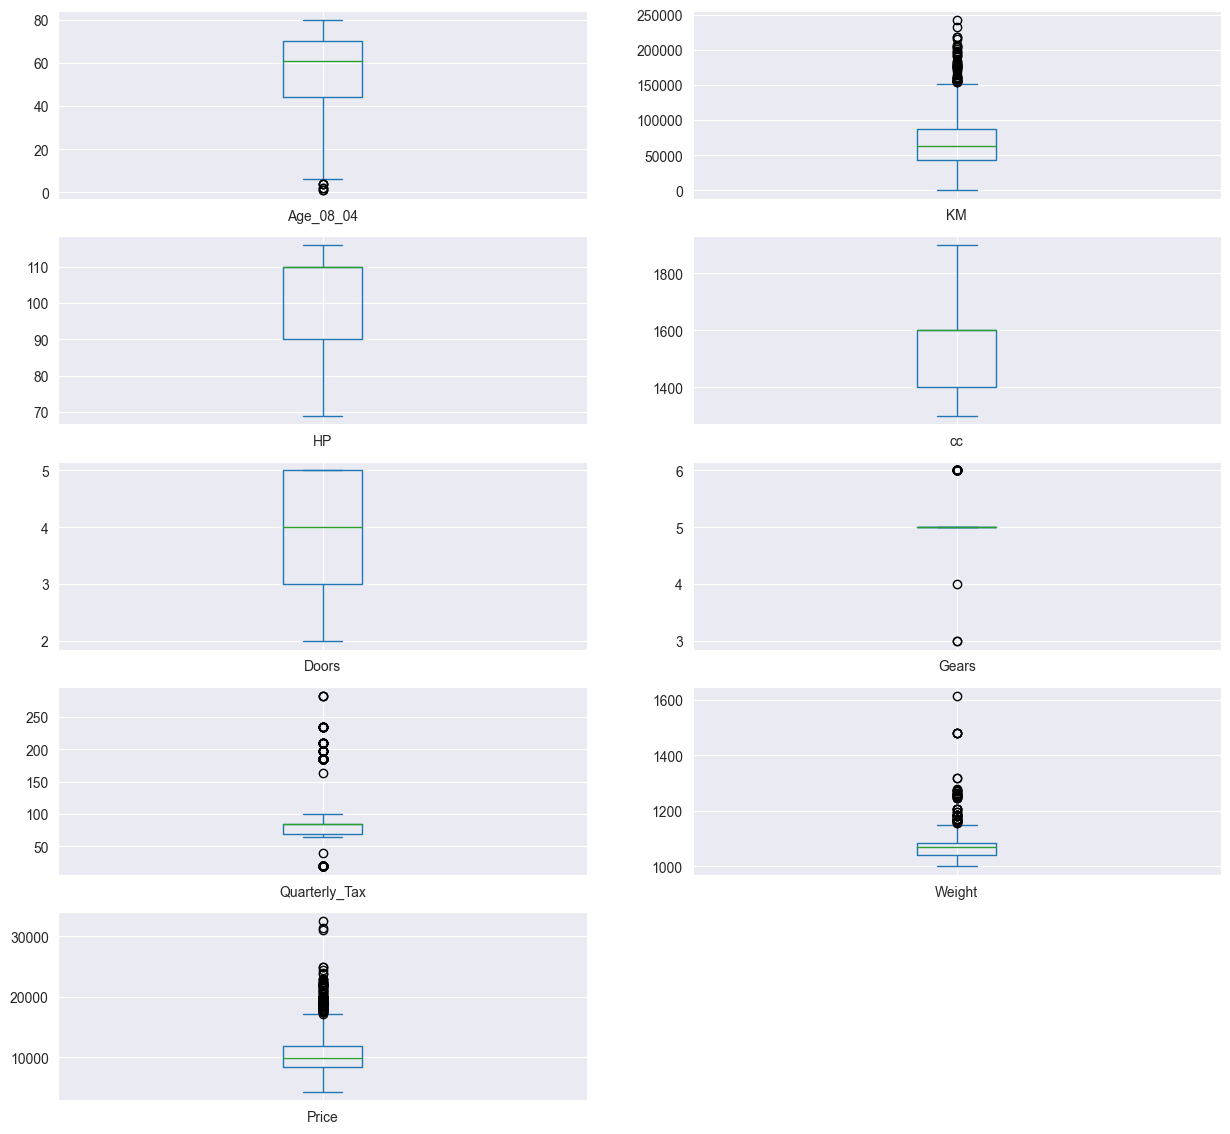

In [114]:
# Box plot find the outliers 

box_plot = new_df_final.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = new_df_final.quantile(0.25)
Q3 = new_df_final.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(new_df_final.columns, box_plot):
    outliers = ((new_df_final[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (new_df_final[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = new_df_final.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

In [115]:
# Correlation matrix to check the multi collinearity of the features
new_df_final.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.504575,-0.105712,-0.134272,-0.146929,-0.005629,-0.193319,-0.466484,-0.876273
KM,0.504575,1.000000,-0.346448,0.138373,-0.035193,0.014890,0.283312,-0.023969,-0.569420
HP,-0.105712,-0.346448,1.000000,0.390624,0.133432,0.086991,-0.362847,-0.005755,0.219683
cc,-0.134272,0.138373,0.390624,1.000000,0.165717,0.092273,0.340968,0.443970,0.164428
Doors,-0.146929,-0.035193,0.133432,0.165717,1.000000,-0.160101,0.107353,0.301734,0.183604
Gears,-0.005629,0.014890,0.086991,0.092273,-0.160101,1.000000,-0.005125,0.021238,0.063831
Quarterly_Tax,-0.193319,0.283312,-0.362847,0.340968,0.107353,-0.005125,1.000000,0.621988,0.211508
Weight,-0.466484,-0.023969,-0.005755,0.443970,0.301734,0.021238,0.621988,1.000000,0.575869
Price,-0.876273,-0.569420,0.219683,0.164428,0.183604,0.063831,0.211508,0.575869,1.000000


<AxesSubplot: >

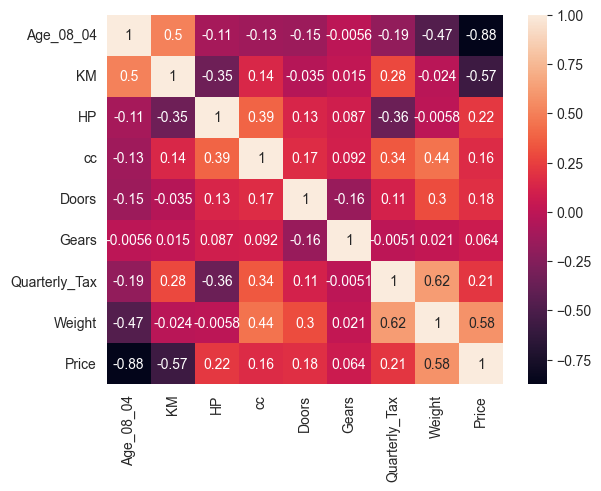

In [116]:
# Heatmaps for the given dataset.
sns.heatmap(new_df_final.corr(), annot=True)

## None of the values is near or equal to 1 or -1. Hence no multicolinearity present.


In [117]:
new_df_final.head(5)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,1600,3,5,210,1165,13500
1,23,72937,90,1600,3,5,210,1165,13750
2,24,41711,90,1600,3,5,210,1165,13950
3,26,48000,90,1600,3,5,210,1165,14950
4,30,38500,90,1600,3,5,210,1170,13750


In [118]:
# Calculating VIF Values in order to check the multicollinearity
import statsmodels.formula.api as smf

rds_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_df_final).fit().rsquared  
vif_Age_08_04 = 1/(1-rds_Age_08_04) 

rds_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_df_final).fit().rsquared  
vif_KM = 1/(1-rds_KM) 

rds_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_df_final).fit().rsquared  
vif_HP = 1/(1-rds_HP)

rds_cc = smf.ols('cc~Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax+Weight',data=new_df_final).fit().rsquared  
vif_cc = 1/(1-rds_cc)

rds_Doors = smf.ols('Doors~Age_08_04+HP+cc+KM+Gears+Quarterly_Tax+Weight',data=new_df_final).fit().rsquared  
vif_Doors = 1/(1-rds_Doors)

rds_Gears = smf.ols('Gears~Age_08_04+HP+cc+Doors+KM+Quarterly_Tax+Weight',data=new_df_final).fit().rsquared  
vif_Gears = 1/(1-rds_Gears)

rds_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+HP+cc+Doors+Gears+KM+Weight',data=new_df_final).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rds_Quarterly_Tax)

rds_Weight = smf.ols('Weight~Age_08_04+HP+cc+Doors+Gears+KM+Quarterly_Tax',data=new_df_final).fit().rsquared  
vif_Weight = 1/(1-rds_Weight)

# Storing vif values in a data frame
# Age_08_04	KM	HP	cc	Doors	Gears	Quarterly_Tax	Weight
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors', 'Gears', 'Quarterly_Tax', 'Weight'],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.883233
1,KM,1.918382
2,HP,2.085049
3,cc,1.984763
4,Doors,1.169784
5,Gears,1.050839
6,Quarterly_Tax,2.454921
7,Weight,2.436605


## VIF value for all the features is very low. Hence all the variables are significant and there is no presence of multicollinearity.

## From both the correlation matrix and the VIF value show that none of the feature depend on each other. Hence there is no multicollinearity present in the dataset.

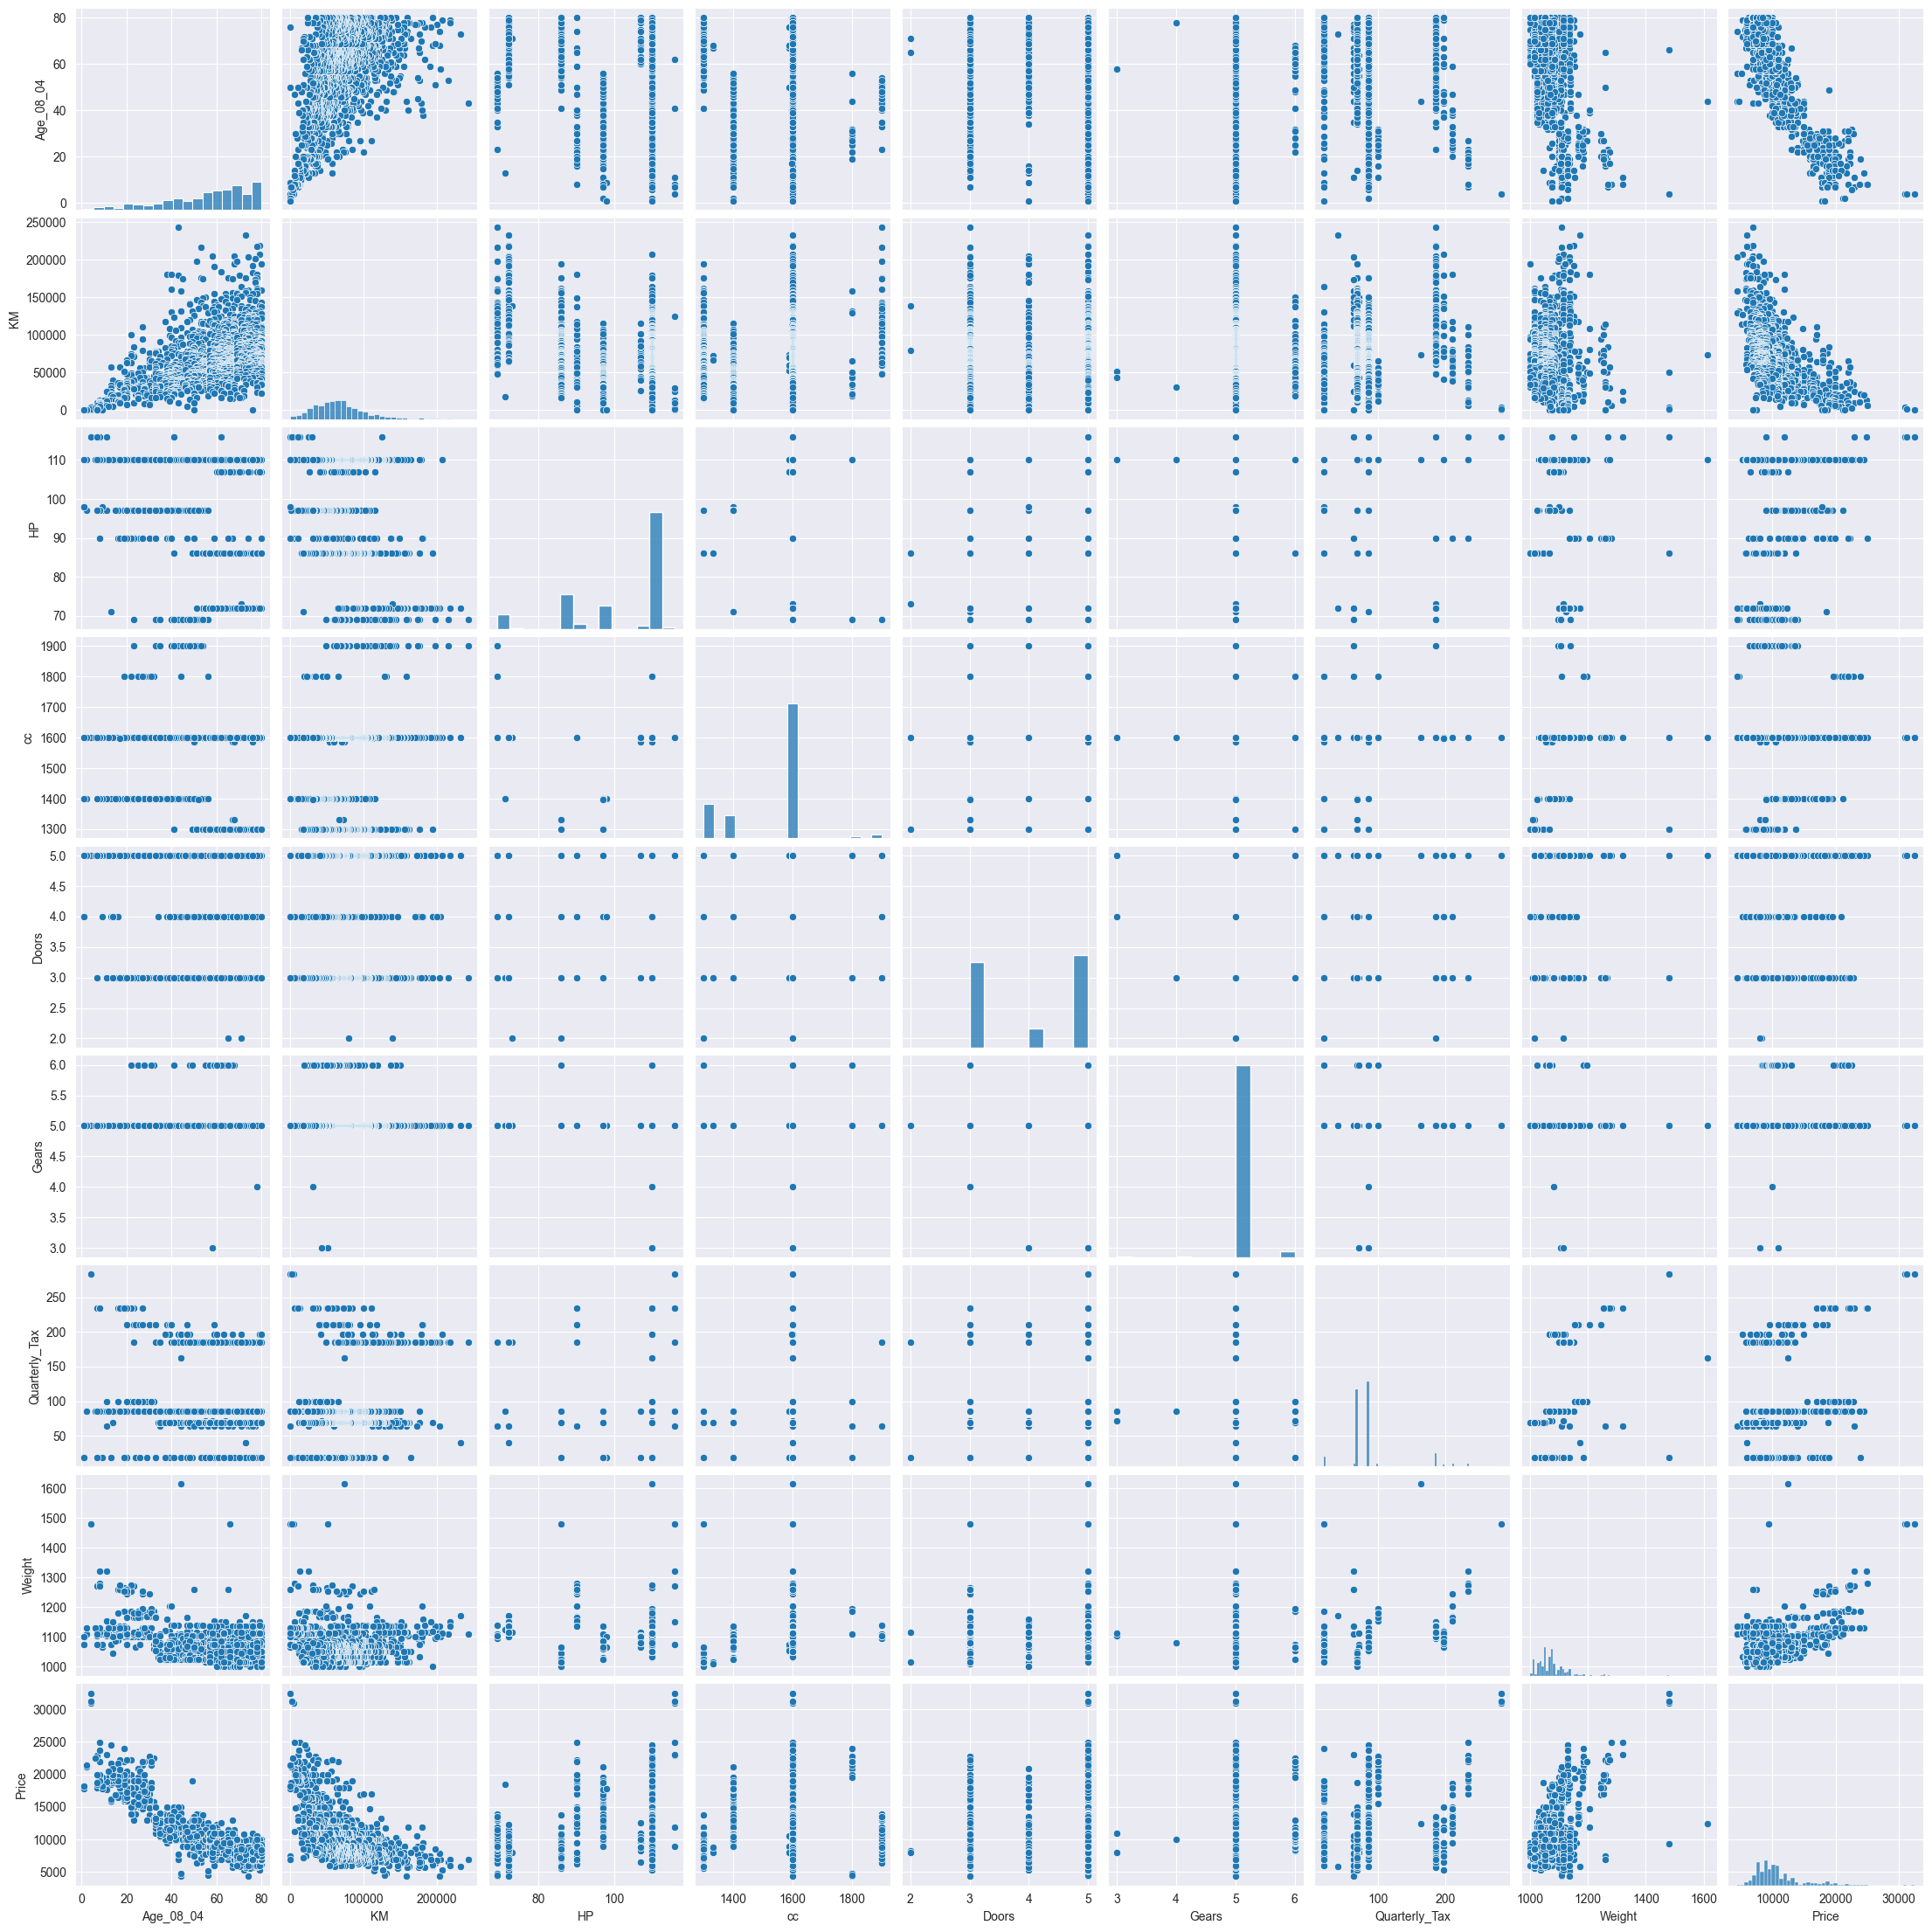

In [119]:
# Drawing Histogram to check the distribution of the data.
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(new_df_final)

## Some of the histogram shows that the features are not normally distributed.

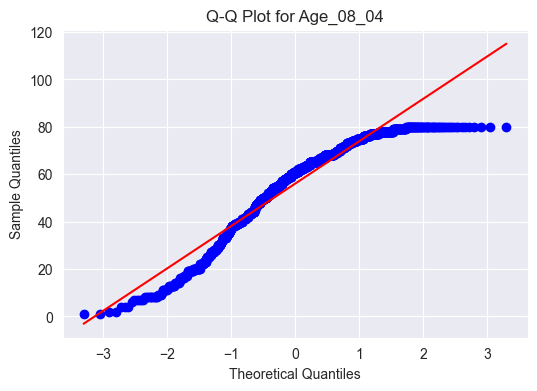

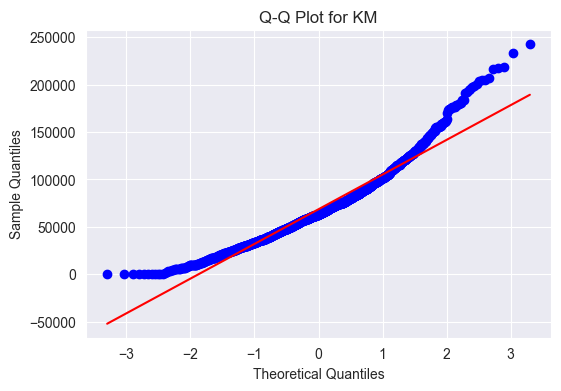

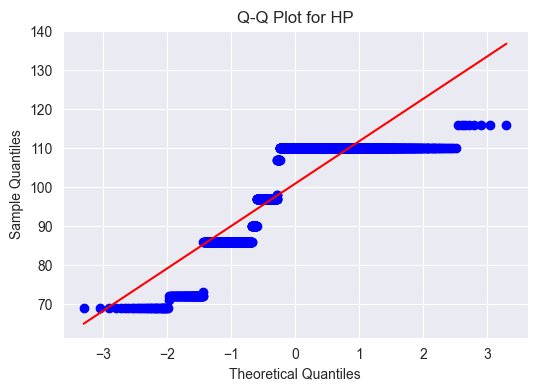

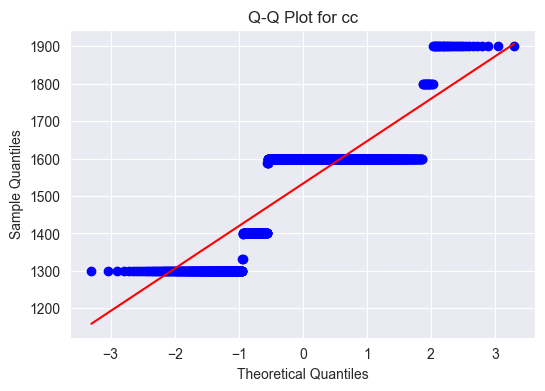

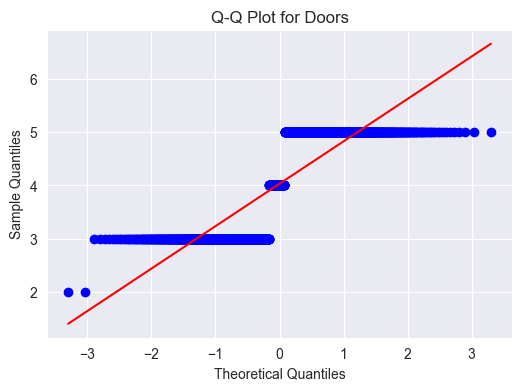

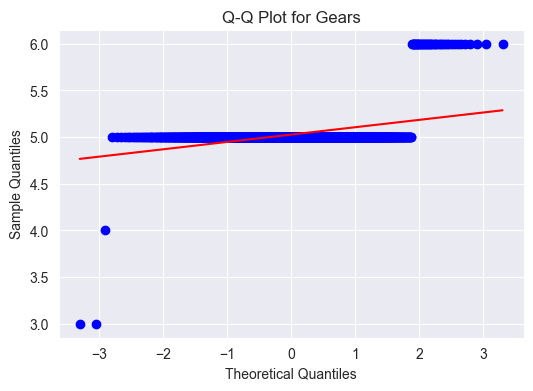

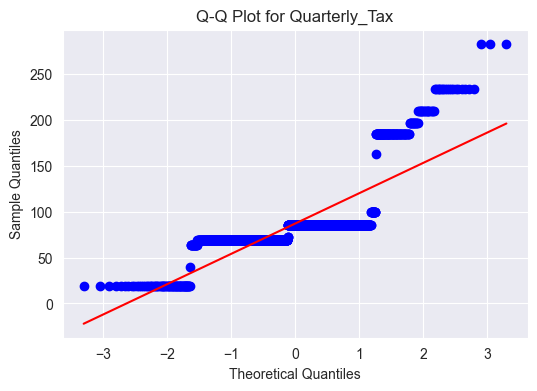

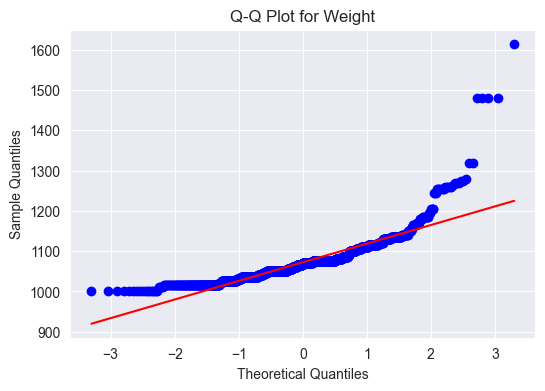

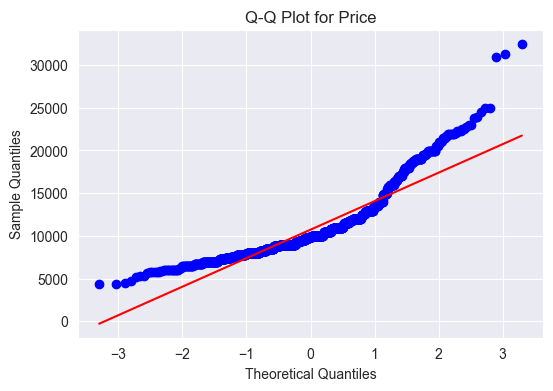

In [148]:
# Using Q-Q plot for checking the data distribution
# Create Q-Q plots for each variable in separate graphs
for col in new_df_final.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(new_df_final[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

## Some of the Q-Q plot shows that features are not normally distributed.

## Hence we can use Normalization for transformation.

In [206]:
#define predictor and response variables
x = new_df_final[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
y = new_df_final['Price']

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
# Initialize the Normalization
min_max_scaler = MinMaxScaler()

# Fit and transform the data using standardization
normalized_data_minmax = min_max_scaler.fit_transform(new_df_final)


# Create a new DataFrame with the standardized data
norm_df = pd.DataFrame(normalized_data_minmax, columns = new_df.columns)

In [128]:
norm_df.head(2)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,0.278481,0.193355,0.446809,0.5,0.333333,0.666667,0.723485,0.268293,0.325044
1,0.278481,0.300149,0.446809,0.5,0.333333,0.666667,0.723485,0.268293,0.333925


In [129]:
#Build model
import statsmodels.formula.api as smf 
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=norm_df).fit()

In [130]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1091.
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:30:51   Log-Likelihood:                 2320.6
No. Observations:                1435   AIC:                            -4623.
Df Residuals:                    1426   BIC:                            -4576.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3541      0.016     22.114      0.000       0.323       0.386
Age_08_04        -0.3436      0.007    -46.248      0.000      -0.358      -0.329
KM               -0.1651      0.011    -14.456      0.000      -0.187      -0.143
HP                0.0647      0.007      9.530      0.000       0.051       0.078
cc               -0.0549      0.008     -6.858      0.000      -0.071      -0.039
Doors            -0.0010      0.004     -0.221      0.825      -0.009       0.008
Gears             0.1100      0.021      5.300      0.000       0.069       0.151
Quarterly_Tax     0.0399      0.013      3.108      0.002       0.015       0.065
Weight            0.4378      0.023     18.733      0.000       0.392       0.484
==============================================================================
Omnibus:                      212.832   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2490.375
Skew:                          -0.247   Prob(JB):                         0.00
Kurtosis:                       9.435   Cond. No.                         36.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
# Evaluate using Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [166]:
#define predictor and response variables
X = norm_df[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
Y = norm_df['Price']

num_folds = 10

kfold = KFold(n_splits=num_folds, random_state=10, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

In [167]:
results

array([0.86686472, 0.88576716, 0.87854869, 0.83848924, 0.85366253,
       0.88285191, 0.82069736, 0.86701974, 0.80827122, 0.80045535])

In [168]:
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
sqrt(mean(absolute(results)))

0.9220969542239994

### R-squared > 85%.  
### Adj. R-squared > 85%
### Adj. R-squared < R-squared
### Hence the model is good.
### K-fold cross validation rmse values are close to each other and also close to the average value and the ols              model. Hence there is no overfitting issue.  

## Residual Analysis
## Test for Normality of Residuals (Q-Q Plot)

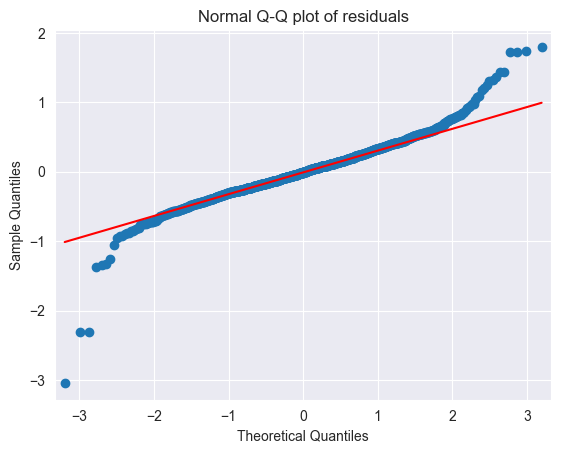

In [169]:
# Residual Analysis
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Points are Close to the line hence the model is good

## Residual Plot for Homoscedasticity

In [136]:
# Checking for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

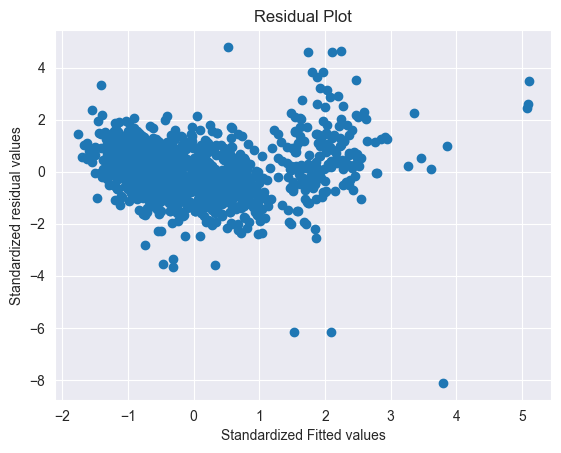

In [137]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Model is showing Homoscedasticity. Hence model is good.

##  Residual Vs Regressors

In [171]:
# Create a copy of the DataFrame
norm_df_copy = norm_df.copy()

In [172]:
norm_df_copy.head(2)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,0.278481,0.193355,0.446809,0.5,0.333333,0.666667,0.723485,0.268293,0.325044
1,0.278481,0.300149,0.446809,0.5,0.333333,0.666667,0.723485,0.268293,0.333925


In [174]:
# Removing the Target variable to draw Residual vs Regressors plot for each feature.
norm_df_copy = norm_df_copy.drop(columns=norm_df_copy.columns[-1])

In [175]:
norm_df_copy.head(2)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.278481,0.193355,0.446809,0.5,0.333333,0.666667,0.723485,0.268293
1,0.278481,0.300149,0.446809,0.5,0.333333,0.666667,0.723485,0.268293


eval_env: 1


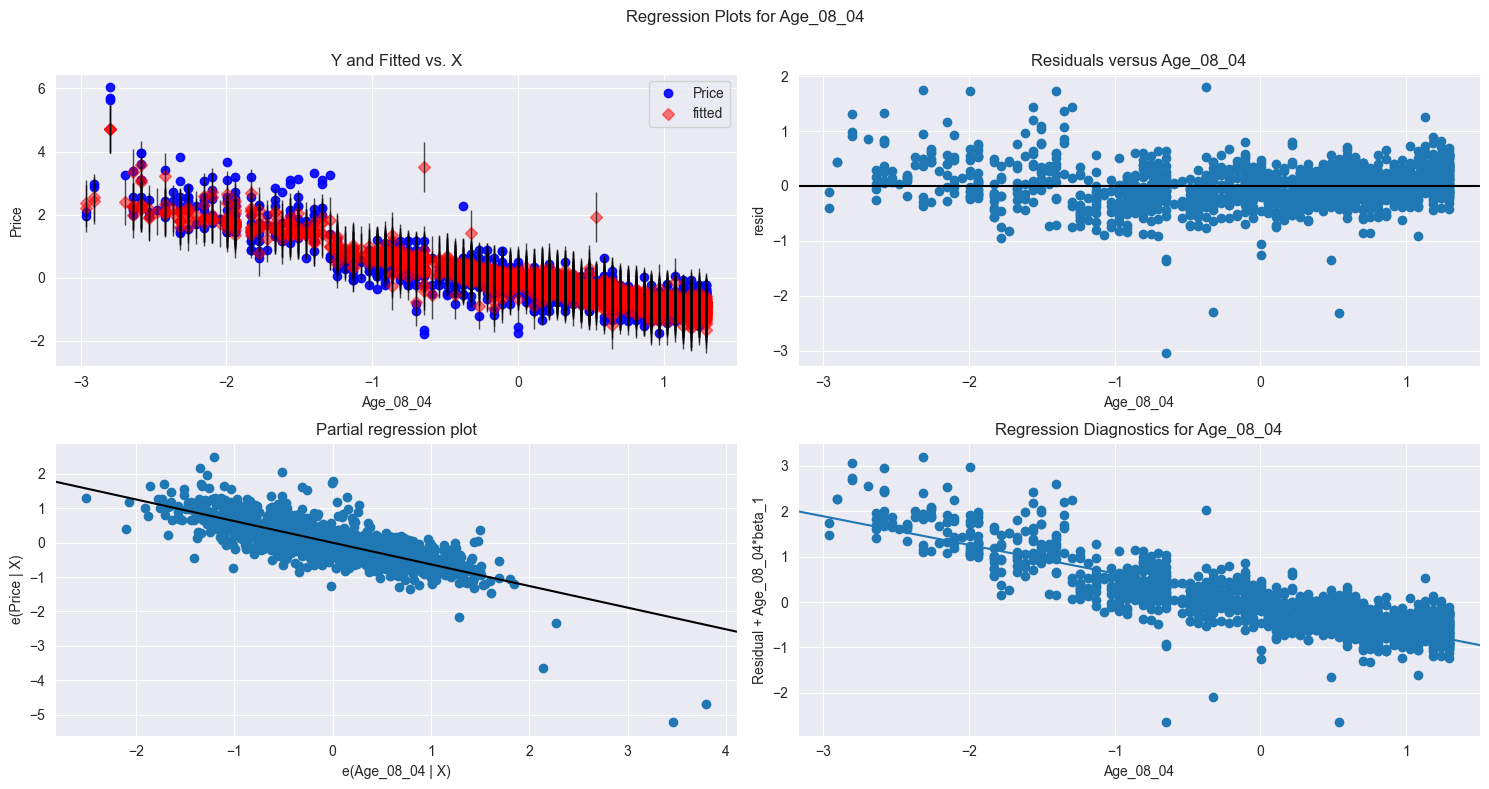

eval_env: 1


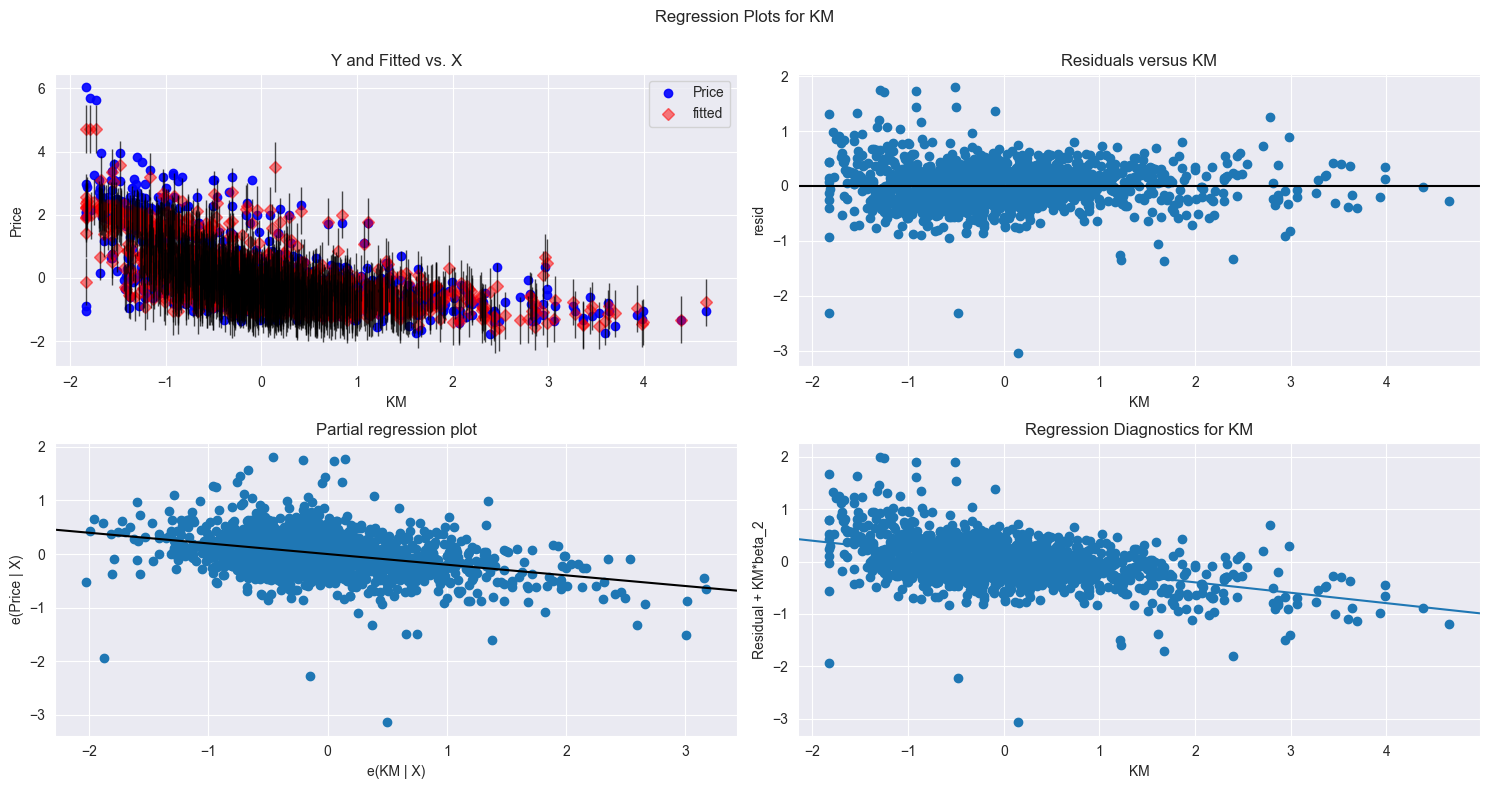

eval_env: 1


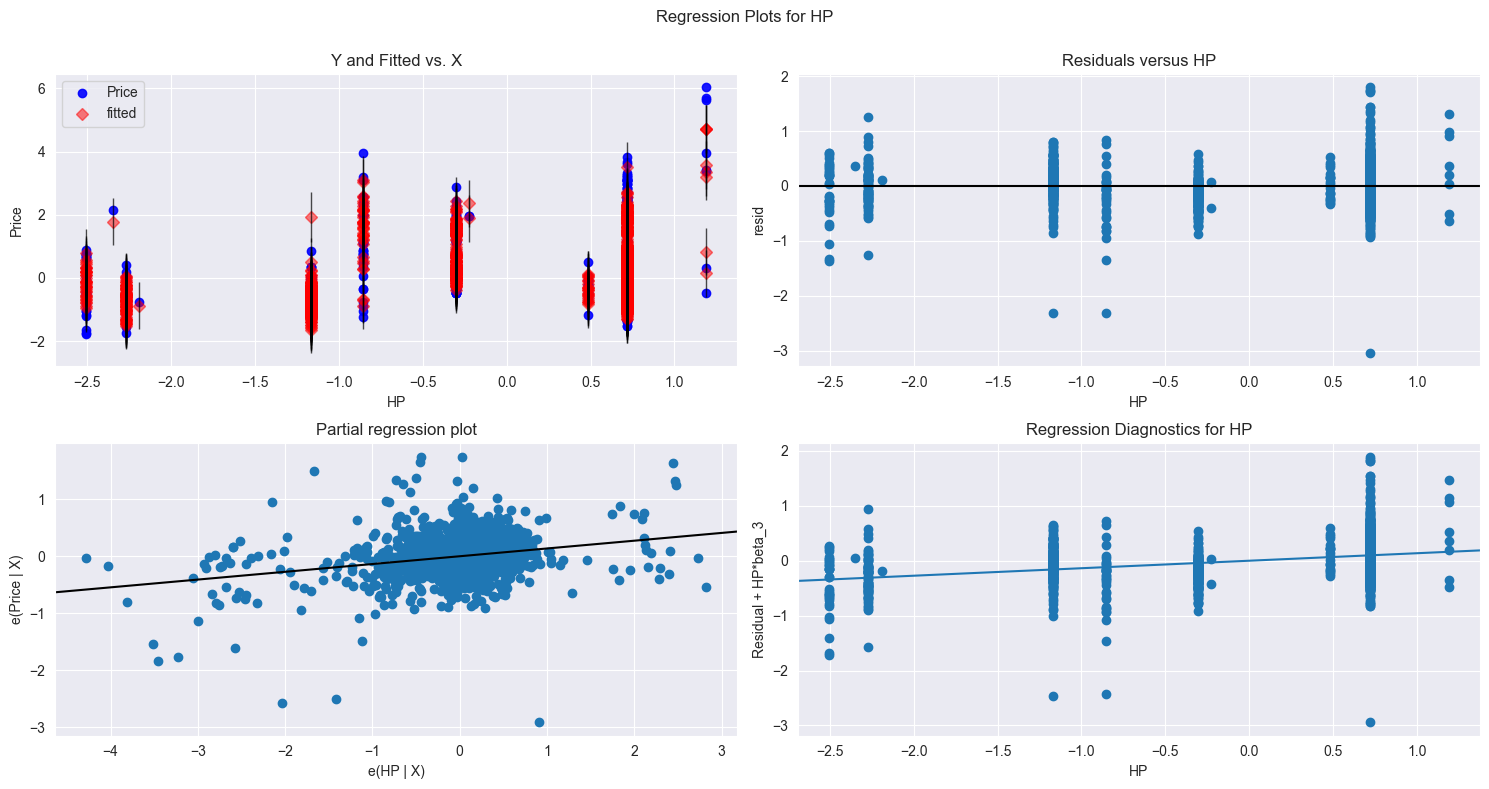

eval_env: 1


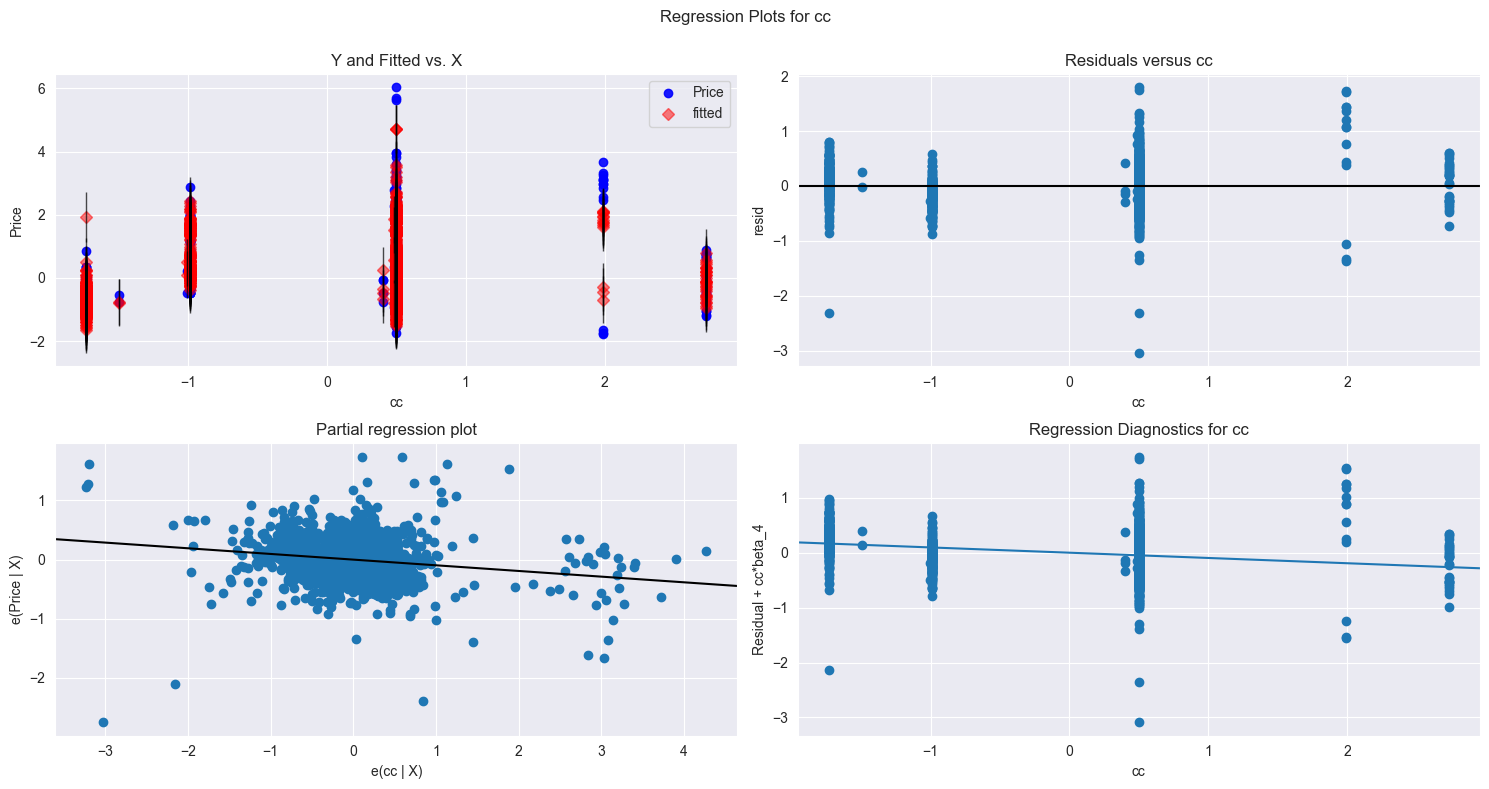

eval_env: 1


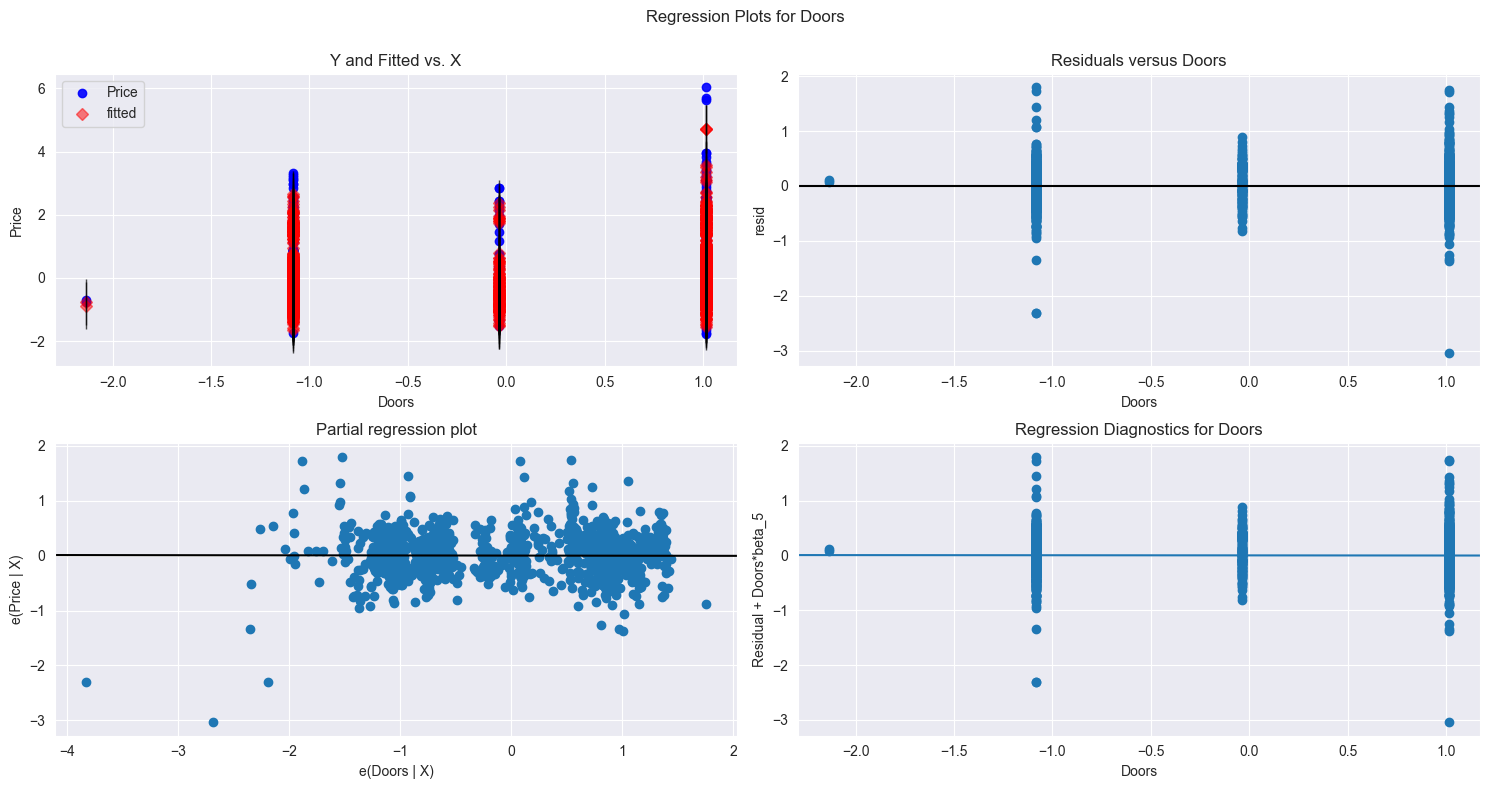

eval_env: 1


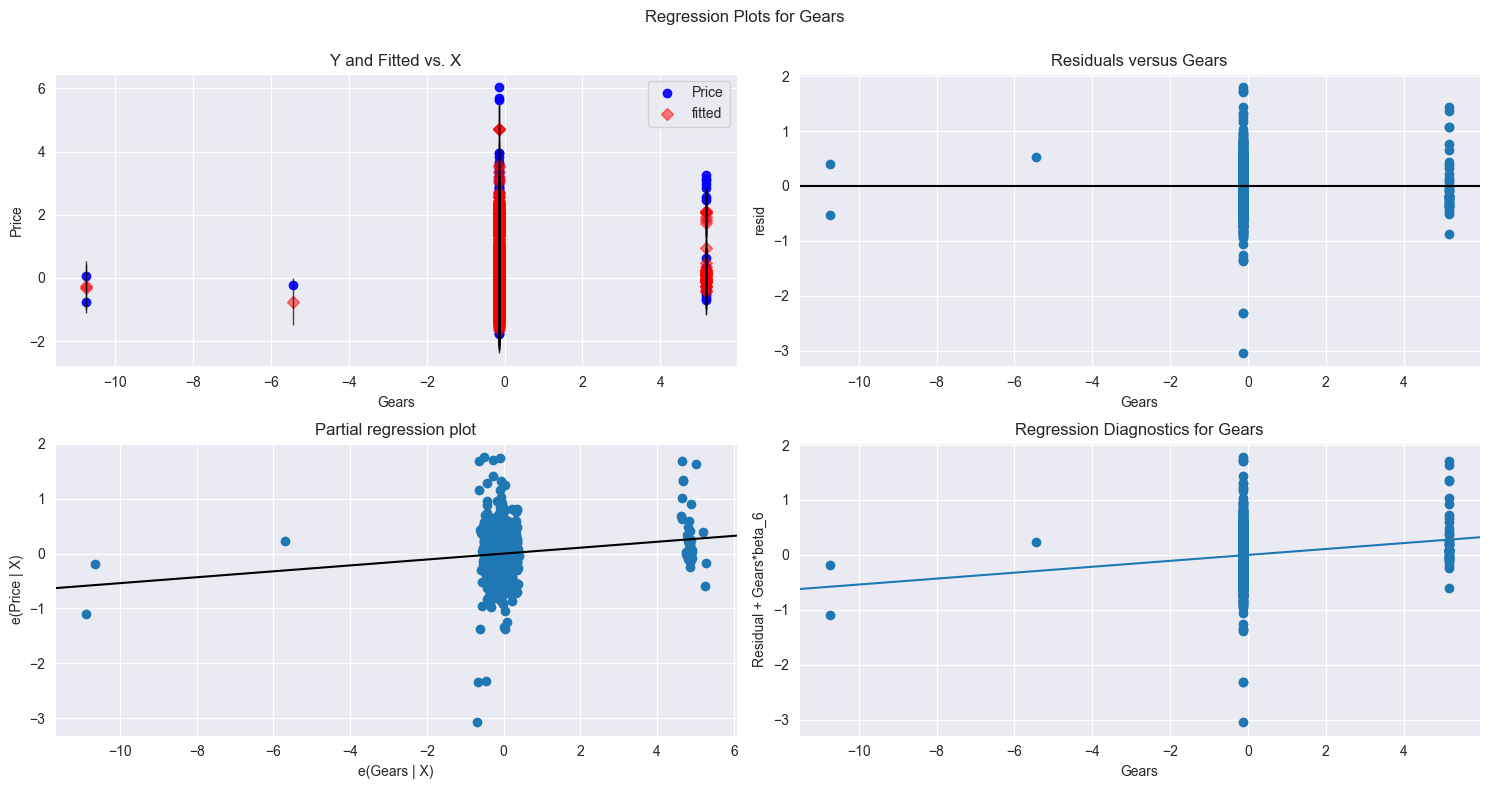

eval_env: 1


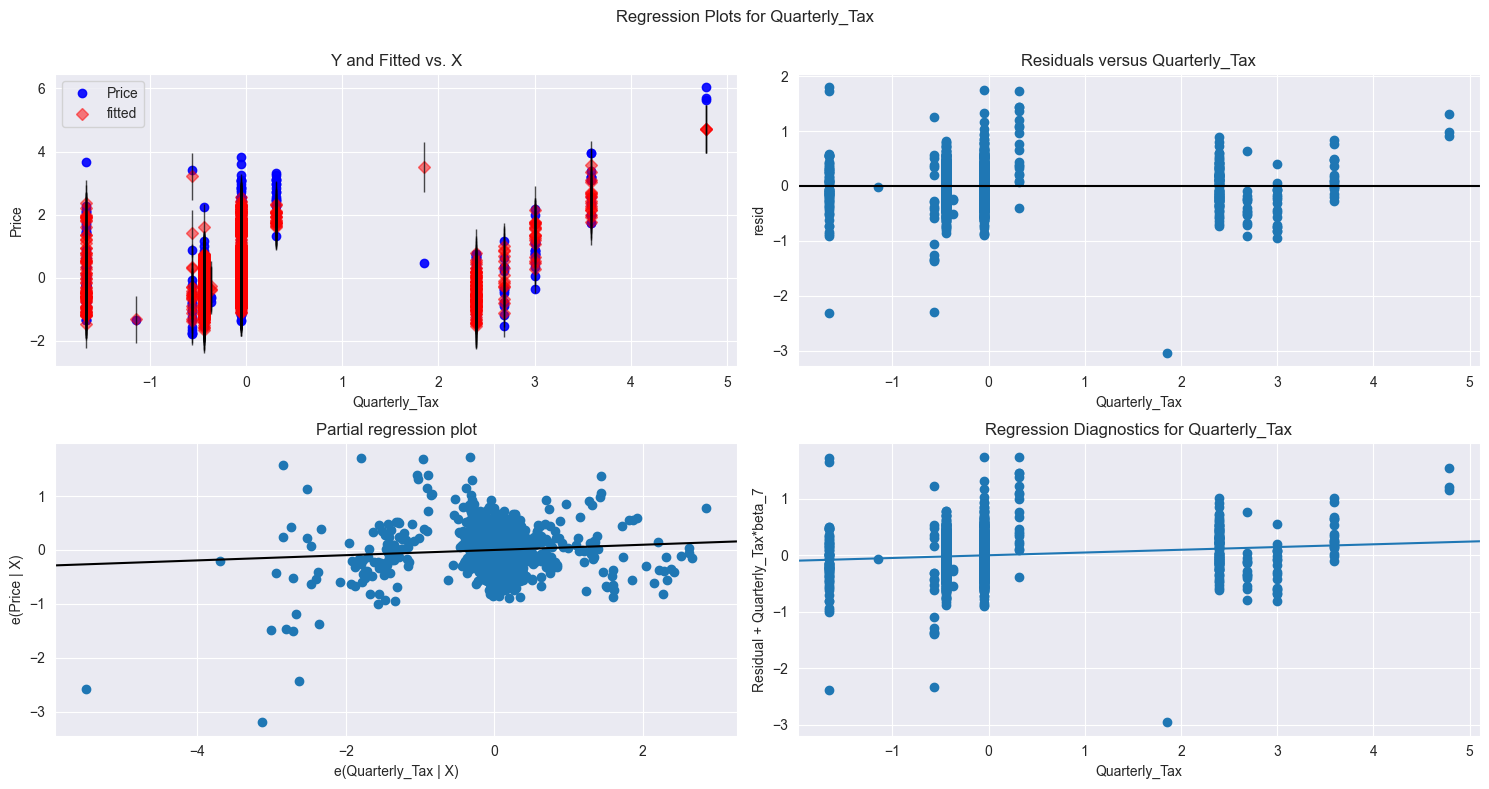

eval_env: 1


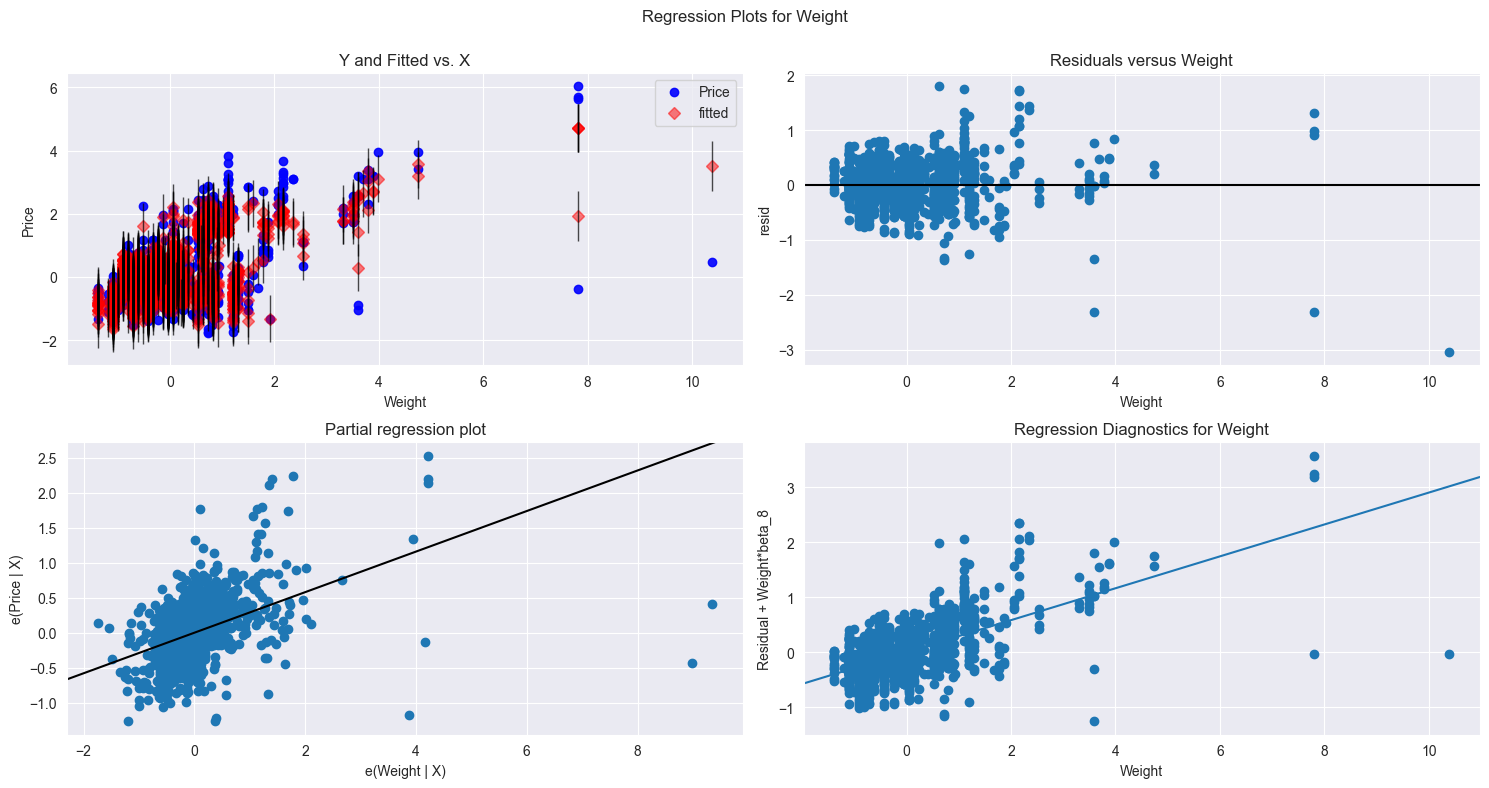

In [177]:
# Create regression diagnostics plots for each variable by dropping the Target variable.
for col in norm_df_copy.columns:
    fig = plt.figure(figsize=(15, 8))
    fig = sm.graphics.plot_regress_exog(model1, col, fig=fig)
    plt.title(f"Regression Diagnostics for {col}")
    plt.show()

### From the above graphs we can conclude that most of the fitted values is near to actual values and there no such patterns present in the residual vs variable graph. Hence the model is significantly accurate.

## Model Deletion Diagnostics
## Detecting Influencers/Outliers
## Cook’s Distance

In [138]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

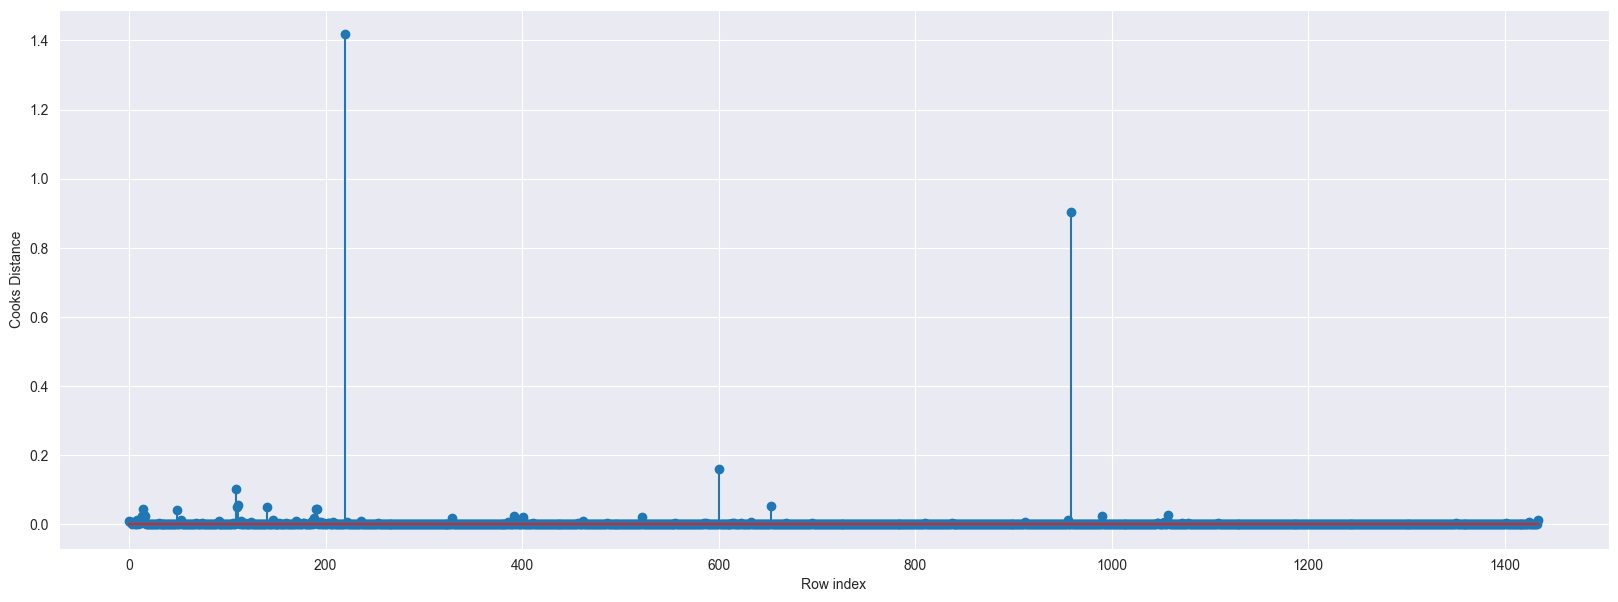

In [139]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(norm_df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [140]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(220, 1.41769523223324)

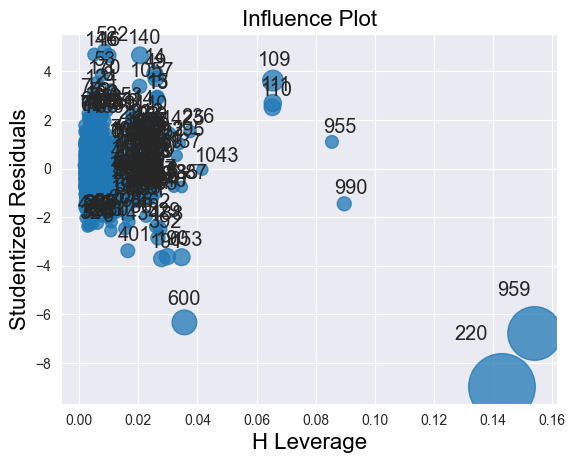

In [142]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [144]:
k = norm_df.shape[1]
n = norm_df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

### From the above methods we can conclude that 220 and 959 are outliers. Hence dropping it may increase the            model. 

In [178]:
#Drop 220 and 959 observations
c_new_df = norm_df.drop(norm_df.index[[220,959]],axis=0)

In [179]:
c_new_df.shape

(1433, 9)

In [180]:
#Reset the index and re arrange the row values
c_new_df_1=c_new_df.reset_index()

In [181]:
c_new_df_2=c_new_df_1.drop(['index'],axis=1)

In [182]:
#Build model
import statsmodels.formula.api as smf 
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=c_new_df_2).fit()

In [183]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1232.
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:59:51   Log-Likelihood:                 2392.6
No. Observations:                1433   AIC:                            -4767.
Df Residuals:                    1424   BIC:                            -4720.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3488      0.015     22.937      0.000       0.319       0.379
Age_08_04        -0.3242      0.007    -44.904      0.000      -0.338      -0.310
KM               -0.1634      0.011    -15.076      0.000      -0.185      -0.142
HP                0.0640      0.006      9.908      0.000       0.051       0.077
cc               -0.0705      0.008     -9.166      0.000      -0.086      -0.055
Doors            -0.0089      0.004     -2.133      0.033      -0.017      -0.001
Gears             0.1022      0.020      5.190      0.000       0.064       0.141
Quarterly_Tax    -0.0047      0.013     -0.368      0.713      -0.030       0.020
Weight            0.6138      0.026     23.385      0.000       0.562       0.665
==============================================================================
Omnibus:                      151.519   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1177.318
Skew:                          -0.081   Prob(JB):                    2.23e-256
Kurtosis:                       7.438   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
#define predictor and response variables
X = c_new_df_2[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
Y = c_new_df_2['Price']

num_folds = 10

kfold = KFold(n_splits=num_folds, random_state=10, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

In [185]:
results

array([0.87882397, 0.87401475, 0.89927652, 0.83043978, 0.88436492,
       0.8759056 , 0.88853986, 0.90272427, 0.78912913, 0.81043998])

In [186]:
sqrt(mean(absolute(results)))

0.9291748370626821

### As we can see that model performance has increased as we remove the outlier. Hence it is not affecting the model performance.

In [187]:
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

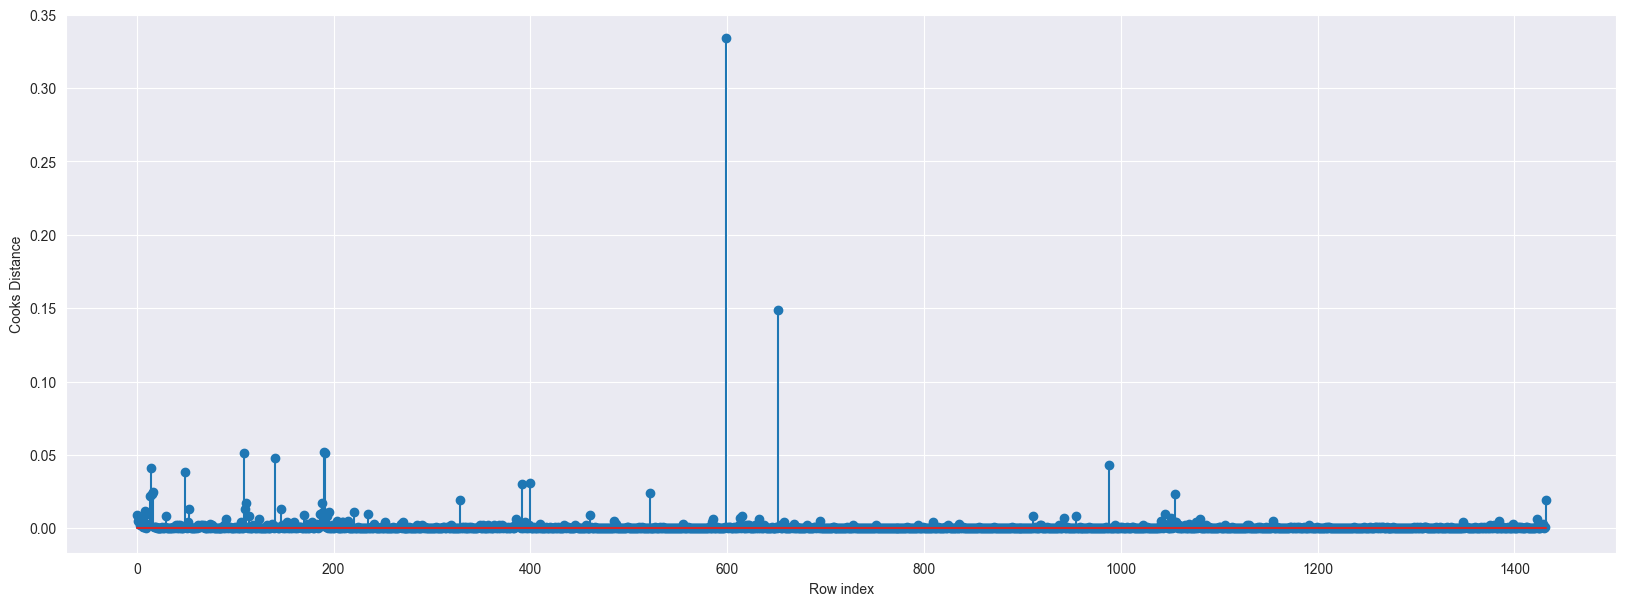

In [188]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(c_new_df_2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

### From the above graph we can conclude that none of the cook's distance is greater than one. Hence none are influencers.

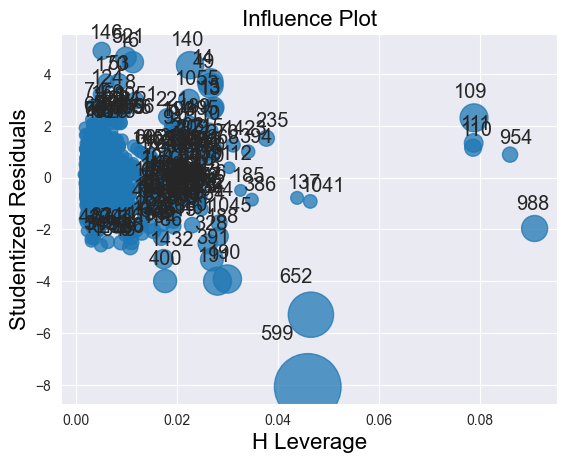

In [193]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [190]:
k = c_new_df_2.shape[1]
n = c_new_df_2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.0209351011863224

### There are no common outlier from the above methods. Hence the model is good.

In [191]:
final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=c_new_df_2).fit()

In [192]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1232.
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:27:35   Log-Likelihood:                 2392.6
No. Observations:                1433   AIC:                            -4767.
Df Residuals:                    1424   BIC:                            -4720.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3488      0.015     22.937      0.000       0.319       0.379
Age_08_04        -0.3242      0.007    -44.904      0.000      -0.338      -0.310
KM               -0.1634      0.011    -15.076      0.000      -0.185      -0.142
HP                0.0640      0.006      9.908      0.000       0.051       0.077
cc               -0.0705      0.008     -9.166      0.000      -0.086      -0.055
Doors            -0.0089      0.004     -2.133      0.033      -0.017      -0.001
Gears             0.1022      0.020      5.190      0.000       0.064       0.141
Quarterly_Tax    -0.0047      0.013     -0.368      0.713      -0.030       0.020
Weight            0.6138      0.026     23.385      0.000       0.562       0.665
==============================================================================
Omnibus:                      151.519   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1177.318
Skew:                          -0.081   Prob(JB):                    2.23e-256
Kurtosis:                       7.438   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicting for new data

In [209]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04': 0.278481, 'KM': 0.193355, 'HP':0.446809, 'cc':0.5, 'Doors':0.333333, 'Gears':0.666667, 'Quarterly_Tax':0.723485, 'Weight':0.268293},index=[1])

In [203]:
# Predicted value
predicted_value = final_model.predict(new_data)
predicted_value

1    0.446652
dtype: float64

In [207]:
predicted_original = (predicted_value * (y.max() - y.min())) + y.min()

In [208]:
print(predicted_original)

1    16923.252401
dtype: float64
